In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car = pd.read_csv('/content/drive/MyDrive/car price dataset/cardekho_dataset.csv')
car

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
car = car.drop(columns=['Unnamed: 0','car_name','brand'])
car

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              15411 non-null  object 
 1   vehicle_age        15411 non-null  int64  
 2   km_driven          15411 non-null  int64  
 3   seller_type        15411 non-null  object 
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   mileage            15411 non-null  float64
 7   engine             15411 non-null  int64  
 8   max_power          15411 non-null  float64
 9   seats              15411 non-null  int64  
 10  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
# List of numerical columns to check for outliers
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(car[numerical_columns]))

# Define a threshold for identifying outliers
threshold = 3

# Identify rows where any of the Z-scores exceed the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outliers
car = car[~outliers]
car

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15405,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000


In [ ]:
import pandas as pd
car = pd.get_dummies(car, columns=['model'])
car


,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,...,model_XC60,model_XE,model_XF,model_XL6,model_XUV300,model_XUV500,model_Yaris,model_i10,model_i20,model_redi-GO
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,...,False,False,False,False,False,False,False,False,False,False
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,...,False,False,False,False,False,False,False,False,False,False
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,...,False,False,False,False,False,False,False,False,True,False
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,...,False,False,False,False,False,False,False,False,False,False
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000,...,False,False,False,False,False,False,False,False,False,False
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,...,False,False,False,False,False,False,False,True,False,False
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000,...,False,False,False,False,False,False,False,False,False,False
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14417 entries, 0 to 15410
Columns: 106 entries, vehicle_age to model_redi-GO
dtypes: bool(96), float64(2), int64(5), object(3)
memory usage: 2.5+ MB


In [ ]:
print(car['seller_type'].unique())
print(car['fuel_type'].unique())
print(car['transmission_type'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']


In [ ]:
car['seller_type'] = car['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
car['fuel_type'] = car['fuel_type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
car['transmission_type'] = car['transmission_type'].replace({'Manual': 0, 'Automatic': 1})
car

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,...,model_XC60,model_XE,model_XF,model_XL6,model_XUV300,model_XUV500,model_Yaris,model_i10,model_i20,model_redi-GO
0,9,120000,0,0,0,19.70,796,46.30,5,120000,...,False,False,False,False,False,False,False,False,False,False
1,5,20000,0,0,0,18.90,1197,82.00,5,550000,...,False,False,False,False,False,False,False,False,False,False
2,11,60000,0,0,0,17.00,1197,80.00,5,215000,...,False,False,False,False,False,False,False,False,True,False
3,9,37000,0,0,0,20.92,998,67.10,5,226000,...,False,False,False,False,False,False,False,False,False,False
4,6,30000,1,1,0,22.77,1498,98.59,5,570000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,9229,1,0,0,18.90,1197,82.00,5,545000,...,False,False,False,False,False,False,False,False,False,False
15406,9,10723,1,0,0,19.81,1086,68.05,5,250000,...,False,False,False,False,False,False,False,True,False,False
15407,2,18000,1,0,0,17.50,1373,91.10,7,925000,...,False,False,False,False,False,False,False,False,False,False
15408,6,67000,1,1,0,21.14,1498,103.52,5,425000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values = car.isnull().sum()

print(missing_values)

vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
                    ..
model_XUV500         0
model_Yaris          0
model_i10            0
model_i20            0
model_redi-GO        0
Length: 106, dtype: int64


In [ ]:
X = car.drop(['selling_price'],axis=1)
Y = car['selling_price']

In [ ]:
X

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,model_3,...,model_XC60,model_XE,model_XF,model_XL6,model_XUV300,model_XUV500,model_Yaris,model_i10,model_i20,model_redi-GO
0,9,120000,0,0,0,19.70,796,46.30,5,False,...,False,False,False,False,False,False,False,False,False,False
1,5,20000,0,0,0,18.90,1197,82.00,5,False,...,False,False,False,False,False,False,False,False,False,False
2,11,60000,0,0,0,17.00,1197,80.00,5,False,...,False,False,False,False,False,False,False,False,True,False
3,9,37000,0,0,0,20.92,998,67.10,5,False,...,False,False,False,False,False,False,False,False,False,False
4,6,30000,1,1,0,22.77,1498,98.59,5,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,5,9229,1,0,0,18.90,1197,82.00,5,False,...,False,False,False,False,False,False,False,False,False,False
15406,9,10723,1,0,0,19.81,1086,68.05,5,False,...,False,False,False,False,False,False,False,True,False,False
15407,2,18000,1,0,0,17.50,1373,91.10,7,False,...,False,False,False,False,False,False,False,False,False,False
15408,6,67000,1,1,0,21.14,1498,103.52,5,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15405     545000
15406     250000
15407     925000
15408     425000
15410    1200000
Name: selling_price, Length: 14417, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8353035780513172


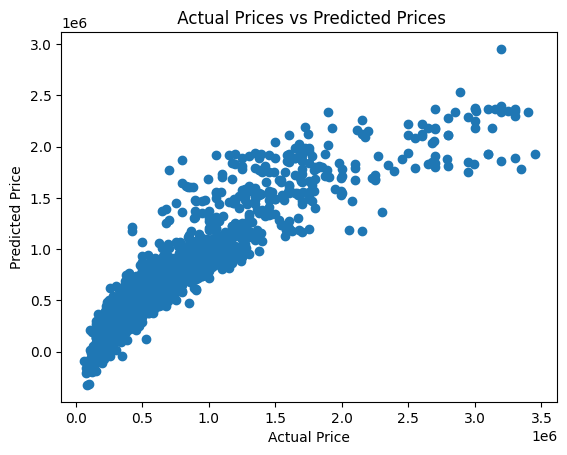

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()